In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston

C:\ProgramData\Anaconda3\envs\torchtest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df = pd.DataFrame( boston['data'] )
df.columns = boston['feature_names']
df['medv'] = boston['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
import seaborn as sb

### 상관관계 히트맵

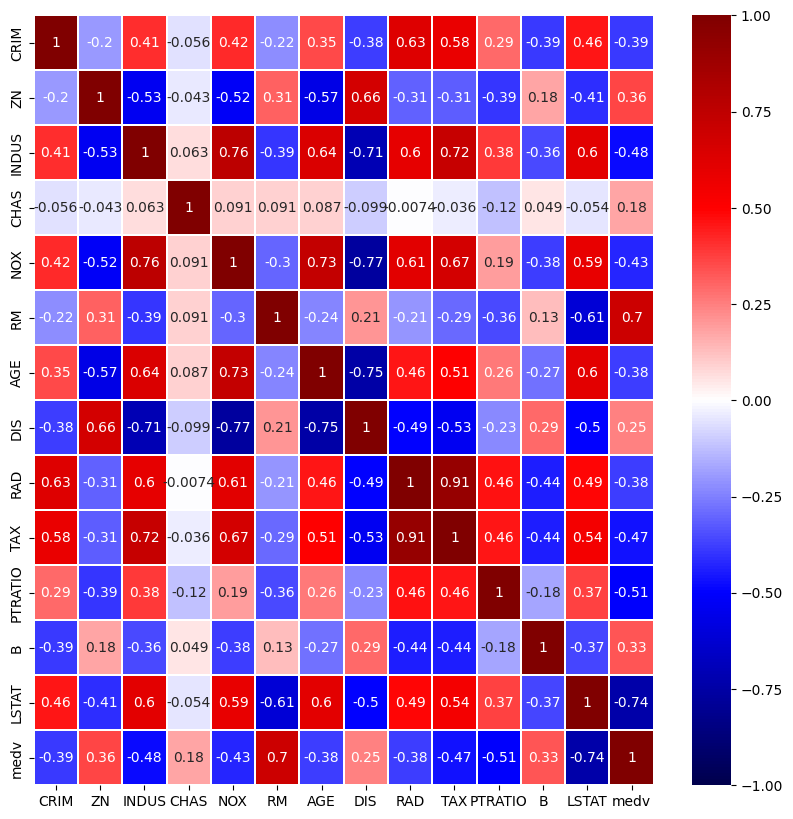

In [6]:
plt.figure(figsize=(10,10))
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True,
           linewidths=0.2, cmap='seismic' )
plt.show()

In [7]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]].values

## 정규화

In [8]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

In [9]:
x= torch.FloatTensor( x_dataN )
y= torch.FloatTensor( y_data )

In [10]:
x.shape

torch.Size([506, 13])

In [11]:
model = Sequential()
model.add_module('nn1',Linear(13,1) )
loss_fn = MSELoss()
optimizer = Adam( model.parameters() , lr=0.1)

In [12]:
hist=[]
for epoch in range(1000):
    optimizer.zero_grad()
    hx = model(x) #matmul( x,w) + b
    cost = loss_fn( hx,y)
    cost.backward()
    optimizer.step()
    print('cost', cost.item() )
    hist.append( cost.item() )

cost 576.1256103515625
cost 550.8590698242188
cost 526.36962890625
cost 502.66998291015625
cost 479.77154541015625
cost 457.6842346191406
cost 436.416259765625
cost 415.9743957519531
cost 396.363525390625
cost 377.58648681640625
cost 359.6444396972656
cost 342.5362243652344
cost 326.2586364746094
cost 310.806396484375
cost 296.17169189453125
cost 282.34478759765625
cost 269.3134460449219
cost 257.06329345703125
cost 245.57760620117188
cost 234.83758544921875
cost 224.82220458984375
cost 215.508544921875
cost 206.87167358398438
cost 198.88504028320312
cost 191.52049255371094
cost 184.7484588623047
cost 178.5382843017578
cost 172.85836791992188
cost 167.67645263671875
cost 162.95974731445312
cost 158.67543029785156
cost 154.7906494140625
cost 151.27301025390625
cost 148.09056091308594
cost 145.2122039794922
cost 142.60791015625
cost 140.2487030029297
cost 138.10711669921875
cost 136.15713500976562
cost 134.37429809570312
cost 132.73599243164062
cost 131.22125244140625
cost 129.8110046386

cost 33.87202072143555
cost 33.83456039428711
cost 33.7972297668457
cost 33.76004409790039
cost 33.722991943359375
cost 33.68607711791992
cost 33.6492919921875
cost 33.61264419555664
cost 33.576133728027344
cost 33.53974914550781
cost 33.503501892089844
cost 33.46739196777344
cost 33.43141174316406
cost 33.395565032958984
cost 33.3598518371582
cost 33.32426834106445
cost 33.288814544677734
cost 33.25349807739258
cost 33.21831130981445
cost 33.183250427246094
cost 33.1483268737793
cost 33.113525390625
cost 33.078857421875
cost 33.044315338134766
cost 33.00990295410156
cost 32.975624084472656
cost 32.94146728515625
cost 32.90744400024414
cost 32.87354278564453
cost 32.83977127075195
cost 32.80612564086914
cost 32.77260208129883
cost 32.73921203613281
cost 32.7059440612793
cost 32.672794342041016
cost 32.63977813720703
cost 32.60688400268555
cost 32.57411575317383
cost 32.54146957397461
cost 32.508941650390625
cost 32.47654724121094
cost 32.444271087646484
cost 32.412109375
cost 32.380077

In [13]:
x_data.values[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [14]:
x_dataN[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

### 0번째행 예측값확인

In [15]:
model( torch.FloatTensor(x_dataN[0].reshape(1,13)) )

tensor([[29.6726]], grad_fn=<AddmmBackward0>)

In [16]:
from sklearn.metrics import r2_score

In [17]:
x_dataN.shape

(506, 13)

In [18]:
pred = model( torch.FloatTensor(x_dataN) ).detach().numpy()

In [19]:
r2_score(y_data, pred)

0.6984544248283118

#### cost 값 plot차트

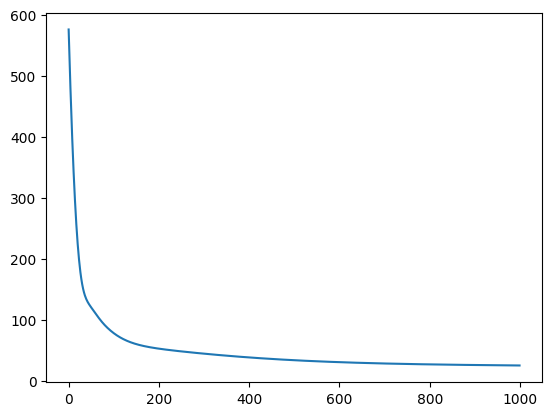

In [20]:
plt.plot(hist)
plt.show()

보스톤 
1) 상관관계 heatmap
2) 정규화후에 학습( 로우레벨, 하이레벨)
3) 0번째 행의 예측값을 구하시요
4) 결정계수값확인
5) cost 의 plot 차트를 그리시요